# Kissa- ja koiraluokittelija v2

Tässä vaiheessa pyritään parantamaan jo luodun neuroverkkomallin tuloksia.

## Kirjastojen tuominen

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.utils import plot_model

## Tuodaan kuvat

### Luodaan uusia kuvia

Tässä vaiheessa luodaan keinotekoisesti uusia kuvia olemassa olevista kuvista koulutusaineistoon. Kuvia lisätään käyttämällä ImageDataGeneratoria, ja kuvat tallennetaan kansioon.

**Cats**

In [2]:
datagen = ImageDataGenerator(zoom_range=0.2, horizontal_flip=True)
i = 0

for batch in datagen.flow_from_directory('./temp/archive/training_set/', classes=['cats'], shuffle=True, target_size=(64, 64), batch_size=1, save_to_dir='./temp/archive/training_set/cats/', save_prefix='cat.'):
    i += 1
    if i > 1000:  # save 1000 new images
        break  # otherwise, the generator would loop indefinitely

print("Saved new images")

Found 8004 images belonging to 1 classes.
Saved new images


**Dogs**

In [3]:
datagen = ImageDataGenerator(shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
i = 0

for batch in datagen.flow_from_directory('./temp/archive/training_set/', classes=['dogs'], shuffle=True, target_size=(64, 64), batch_size=1, save_to_dir='./temp/archive/training_set/dogs/', save_prefix='dog.'):
    i += 1
    if i > 1000:  # save 1000 new images
        break  # otherwise, the generator would loop indefinitely

print("Saved new images")

Found 8009 images belonging to 1 classes.
Saved new images


### Koulutusaineisto

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

training_set = train_datagen.flow_from_directory('./temp/archive/training_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

Found 18015 images belonging to 2 classes.


### Testiaineisto

In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_set= test_datagen.flow_from_directory(
        './temp/archive/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 2023 images belonging to 2 classes.


#### Tutkitaan koulutus ja testisarjoja

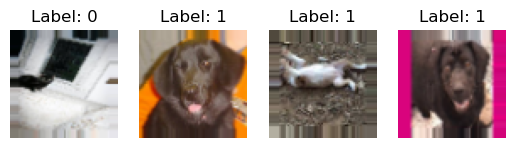

In [6]:
# Haetaan joukko kuvia ja labeleita harjoitussarjasta
batch_train = training_set.next()

# Poimitaan kuvat ja tarrat batchista
images, labels = batch_train

# Printataan muutama kuva
num_images_to_display = 4
for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(images[i])
    plt.title(f"Label: {int(labels[i])}")
    plt.axis("off")

plt.show()

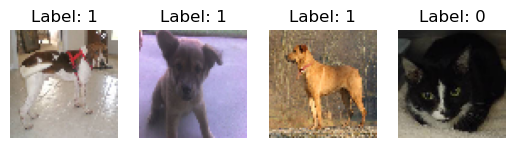

In [7]:
# Haetaan joukko kuvia ja labeleita testisarjasta
batch_test = test_set.next()

# Poimitaan kuvat ja tarrat batchista
images, labels = batch_test

# Printataan muutama kuva
num_images_to_display = 4
for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(images[i])
    plt.title(f"Label: {int(labels[i])}")
    plt.axis("off")

plt.show()

## Konvoluutioneuroverkkomallin luominen

In [8]:
model = tf.keras.models.Sequential()

# Ensimmäinen kerros 'Conv2D'
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=[64,64,3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Toinen kerros
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Kolmas kerros
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Neljäs kerros
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Flatten kerros
model.add(tf.keras.layers.Flatten())

# Dense kerros
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

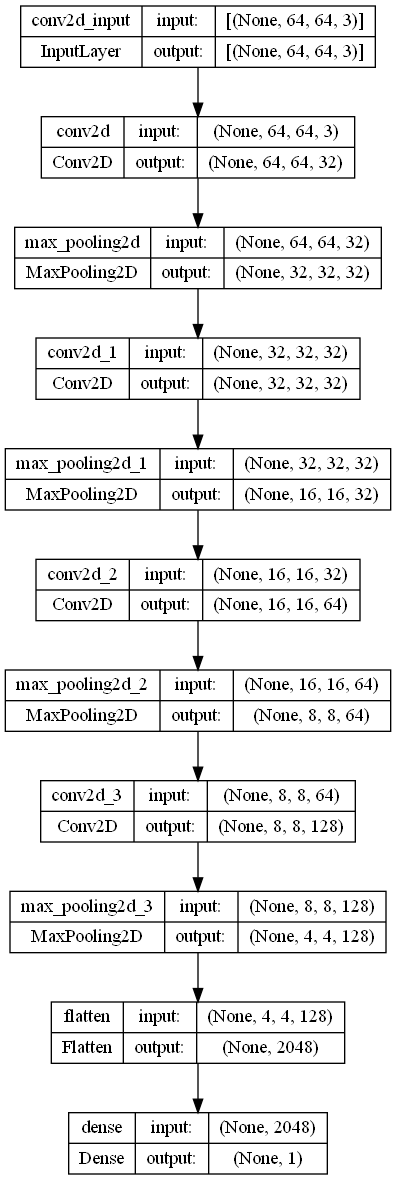

In [9]:
plot_model(model, show_shapes=True, show_layer_names=True)

## Mallin koulutus

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(x=training_set, validation_data=test_set, epochs=16)

Epoch 1/16
563/563 [==============================] - 56s 98ms/step - loss: 0.6543 - accuracy: 0.6109 - val_loss: 0.6399 - val_accuracy: 0.6391
Epoch 2/16
563/563 [==============================] - 49s 87ms/step - loss: 0.5512 - accuracy: 0.7175 - val_loss: 0.5378 - val_accuracy: 0.7350
Epoch 3/16
563/563 [==============================] - 49s 88ms/step - loss: 0.4967 - accuracy: 0.7596 - val_loss: 0.4768 - val_accuracy: 0.7845
Epoch 4/16
563/563 [==============================] - 50s 88ms/step - loss: 0.4501 - accuracy: 0.7888 - val_loss: 0.4710 - val_accuracy: 0.7825
Epoch 5/16
563/563 [==============================] - 50s 89ms/step - loss: 0.4087 - accuracy: 0.8120 - val_loss: 0.4328 - val_accuracy: 0.8038
Epoch 6/16
563/563 [==============================] - 50s 89ms/step - loss: 0.3751 - accuracy: 0.8330 - val_loss: 0.4294 - val_accuracy: 0.8082
Epoch 7/16
563/563 [==============================] - 50s 89ms/step - loss: 0.3454 - accuracy: 0.8484 - val_loss: 0.4368 - val_accuracy:

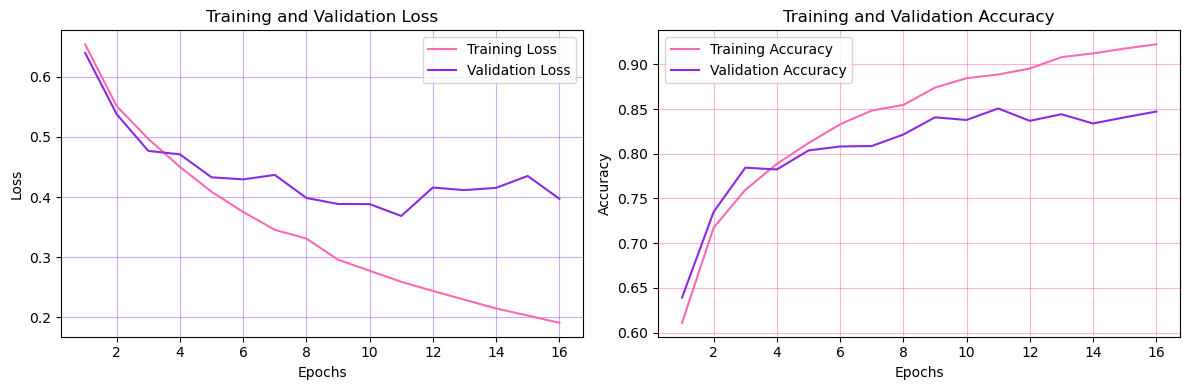

In [11]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Barbie-teemaiset värit
barbie_pink = '#FF69B4'  # Pinkki
barbie_purple = '#8A2BE2'  # Purppura

# Piirretään koulutus ja validointihäviö
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color=barbie_pink)
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color=barbie_purple)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(c=barbie_purple, alpha=0.4)
plt.legend()

# Piiretään koulutus ja validointitarkkuus
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color=barbie_pink)
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color=barbie_purple)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(c=barbie_pink, alpha=0.5)

plt.tight_layout()
plt.show()

## Tallennetaan malli

In [12]:
model.save('model2.keras')

## Pohdintaa

### Kuvien synteettinen generoiminen

Kuvien lisäämisellä oli iso vaikutus mallin tarkkuuteen. Parempia tuloksia varmasti saataisiin, jos koulutuskuvien määrää saisi vielä nostettua. Augmentaatiotekniikat tuovat monipuolisuutta harjoitussarjaan luomalla muunnelmia olemassa olevista kuvista. Tämä voi auttaa mallia yleistämään paremmin erilaisiin olosuhteisiin. Toisaalta tietojen lisäys perustuu olemassa oleviin kuviin, joten se ei esitä täysin uusia kuvioita tai tietoja, joita malli ei ole ennen nähnyt.

Koska lisätyt kuvat on johdettu olemassa olevista merkityistä (labelled) tiedoista, niiden labelit tunnetaan. Tämä varmistaa, että malli oppii muunnelmia säilyttäen silti tarkat luokkatiedot. Uusien kuvien kerääminen taas voi viedä aikaa, varsinkin jos kuvat vaativat työstämistä.

### Kierrokset

#### Häviö

Harjoitushäviö pienenee jaksoittain, mikä on positiivinen merkki. Se osoittaa, että malli oppii minimoimaan ennustettujen tulostensa ja opetusdatan todellisten merkintöjen välisen eron. Validointihäviö osoittaa myös laskevan trendin, mikä viittaa siihen, että malli yleistyy hyvin uuteen dataan.

#### Tarkkuus

Harjoittelun tarkkuus kasvaa, mikä osoittaa, että malli parantaa kykyään luokitella esimerkkejä oikein koulutussarjassa. Validointitarkkuus myös kasvaa, mikä on positiivinen merkki. Se osoittaa, että malli ei pelkästään muista harjoitussarjaa, vaan toimii hyvin myös uusissa, ennennäkemättömissä kuvissa.

#### Havainnot

Harjoittelu- ja validointikäyrät osoittavat hyvää konvergenssia, mikä tarkoittaa, että malli oppii tiedoista ja parantaa suorituskykyään aikakausittain. Harjoitustarkkuus on suhteellisen korkea, noin 92,58 %, mikä viittaa siihen, että malli sopii hyvin harjoitustietoihin.
Validointitarkkuus on noin 84,73 % viimeisellä kierroksella, mikä osoittaa kohtalaisen yleistyksen uuteen, ennennäkemättömään dataan. Useampia kierroksia ajaessa mallissa alkoi näkymään ylisovittamista. Kuvaajia tarkastellessa sitä alkaa näkyä jo muutaman kierroksen jälkeen, tosin ylisovittaminen ei vielä ole voimakasta. 16 kierrosta on jo liikaa, kierrosten määrää voisi laskea esimerkiksi 11:een, jolloin tarkkuus oli hyvä ja häviö pienempää.

### Jatkotoimenpiteet

- Täysin uusien kuvien kerääminen aineistoon.
- Kerrosten lisääminen malliin.
- Hyperparametrien säätäminen edelleen.
- Kierrosten määrän vähentäminen jottei ylisovittamista tapahdu.

Kaiken kaikkiaan tulokset osoittavat mallin oppivan hyvin harjoitustiedoista ja yleistyy kohtuullisen hyvin validointijoukkoon. Lisäkokeilu ja hienosäätö voivat auttaa saavuttamaan haluttaessa entistä paremman suorituskyvyn.